# Mushroom Classificaton
The main objective is to predict what is the class of the mushroom whether it is edible or poisonous. The dataset used for this project is downloaded from the following source: https://www.kaggle.com/uciml/mushroom-classification

Importing all the required libraries:

In [82]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

Loading the data

In [83]:
import pandas as pd

df = pd.read_csv('mushrooms.csv', encoding='utf-8')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Exploration

Shape of the dataset

In [84]:
df.shape

(8124, 23)

Checking for missing values

In [85]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Finding the number of feature columns

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Checking for number of values in each attribute

In [87]:
[df[x].unique().shape[0] for x in df.columns]

[2, 6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 5, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]

In [88]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Count different values of a feature

In [89]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Is dataset balanced?

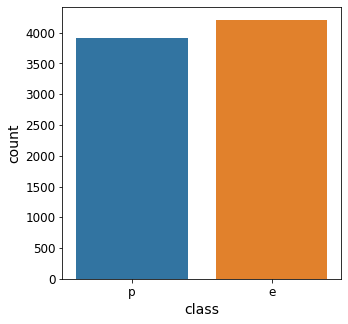

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,5))
sns.countplot('class', data=df)
plt.show()

Defining Feature matrix X, which will be the input for our model

In [91]:
# Store the features
X = df.loc[:, df.columns != 'class']

# Display the first five rows
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Defining feature matrix "y" which is the target vector for the model. This vector consists of a single column, which predicts whether a mushroom is edible or poisonous.

In [92]:
# Store the target variable
y = df['class'].to_frame()

# Display the first five rows
y.head()

,class
0,p
1,e
2,e
3,p
4,e


## One Hot Encoding
Here we can see that all the columns of the dataframe are of the object type so in order to properly analyze them, we need to encode the object values in each column with the appropriate numerical value

In [93]:
X_enc = pd.get_dummies(X)
X_enc.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y.values.ravel())

In [95]:
X_enc.shape

(8124, 117)

From the above cell, we can observe that the number of feature columns is increased from 22 to 117

In [96]:
y_enc.shape

(8124,)

_Splitting the dataset into training set and test set. Here we are stratifying the data using "train_test_split" method, which means training and test set has same proportions of input labels as input dataset._

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.5, random_state=42, stratify=y)

In [98]:
X_train.shape

(4062, 117)

In [99]:
X_test.shape

(4062, 117)

_Standardize features by removing the mean and scaling to unit variance_

In [100]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#Using fit method StandardScaler estimates sample mean and 
#standard deviation for each feature from training dataset

## Using Descision tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [103]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt1, X_train_std, y_train, cv=8, scoring="accuracy")

array([1.       , 1.       , 1.       , 1.       , 0.9980315, 1.       ,
       1.       , 1.       ])

In [104]:
from sklearn.metrics import roc_curve, auc
y_pred = dt1.predict(X_test_std)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

AUC is sorting based algorithm which provides an aggregate measure of performance across all possible classification thresholds.
AUC is scale-invariant and classification threshold-invariant.
Prediction is 100 percent correct if AUC = 1

In [105]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2104,    0],
       [   0, 1958]])

Descision tree has a disadvantage of overfitting.

## Logistic regression: Using Stochastic Gradient Descent model with Log loss
Schocastic gradient descent is very sensitive to whether the data is scaled or not.

In [106]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(tol=1e-3, random_state=42, loss='log')
sgd_clf.fit(X_train_std, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_test_pred = sgd_clf.predict(X_test_std)

Evaluating the model performance

In [108]:
print("Accuracy score: ", (accuracy_score(y_test, y_test_pred)))
print("Precision score: ", (precision_score(y_test, y_test_pred)))
print("Recall score: ", (recall_score(y_test, y_test_pred)))

y_test_scores = sgd_clf.predict_proba(X_test_std)[:,1]

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0


ROC(Receiver Opearting characteristics) ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the "ideal" point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better. Eachh point on ROC curve represents the corresponding ratio of false positive rate to true positive rate at each threshold value.

In [109]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)
roc_auc = auc(fpr, tpr)

In [110]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [111]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

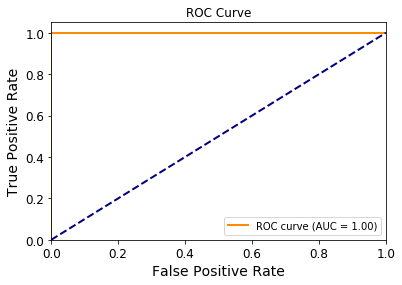

In [112]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## using SVM Classifier
To reduce overfitting

In [113]:
from sklearn.svm import SVC

#rbf kernel is used, gamma is another hyper parameter associated with kernel(gamma controls kernel)
svm_clf = SVC(gamma='auto', kernel='rbf', random_state=42, probability=True)
svm_clf.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [114]:
y_test_pred = svm_clf.predict(X_test_std)

print("Accuracy score: ", (accuracy_score(y_test, y_test_pred)))
print("Precision score: ", (precision_score(y_test, y_test_pred)))
print("Recall score: ", (recall_score(y_test, y_test_pred)))

Accuracy score:  0.9992614475627769
Precision score:  1.0
Recall score:  0.998467824310521


## Random Forest

In [115]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train_std, y_train);
predictions = rf.predict(X_test_std)
cm = sklearn.metrics.confusion_matrix(y_test,predictions)
print(cm)

[[2104    0]
 [   0 1958]]


## Calculating the feature importance

In [116]:
from sklearn.tree.export import export_graphviz
from IPython.display import Image  
import matplotlib.pyplot as plt
from io import StringIO
import pydotplus

importances = dt1.tree_.compute_feature_importances(normalize=False)
print("feature importances = " + str(importances))

feature importances = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.82417169e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.87016462e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.04841520e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.35483707e-02 5.06151776e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.27589668e-02 0.00000000e+00
 0.00000000e+00 8.43920550e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.03794691e-02
 0

In [117]:
importances.shape

(117,)

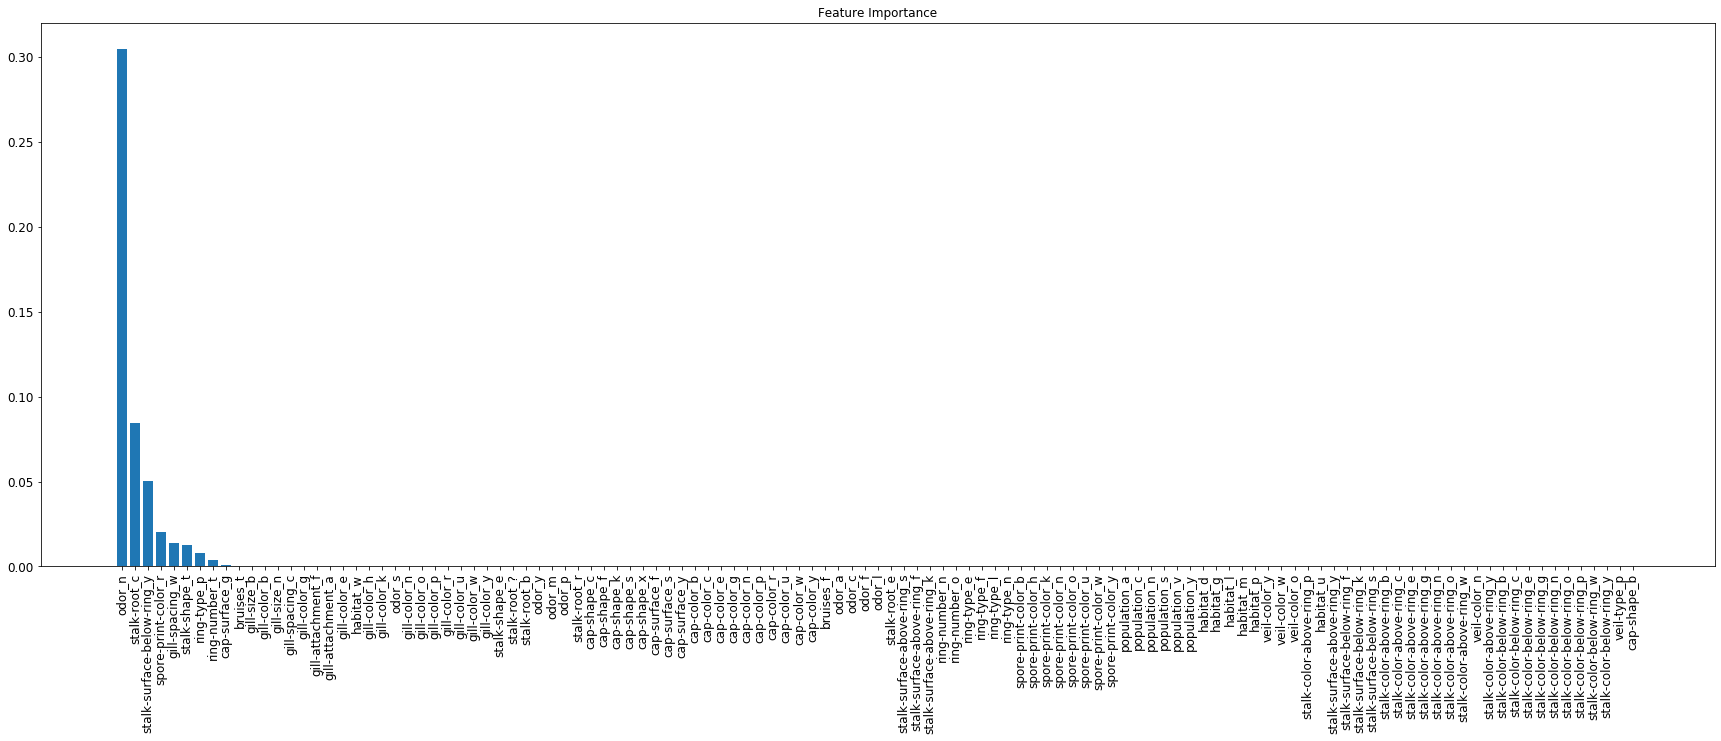

In [118]:
#Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_enc.columns[i] for i in indices]

# Create plot 
plt.figure(figsize=(30,10))
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_enc.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_enc.shape[1]), names, rotation=90)

plt.show()

## PCA Analysis

In [119]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_enc)

array([[-9.96245191e-01, -9.46891589e-01,  8.02493196e-01, ...,
         6.35543220e-16, -6.59642167e-17, -7.93405870e-17],
       [-1.44173282e+00, -1.64154148e-01,  1.06817487e+00, ...,
        -7.28313150e-16,  1.74856431e-15,  1.61004716e-16],
       [-1.52408477e+00, -4.08745961e-01,  8.53171512e-01, ...,
         5.14177748e-17,  1.86901061e-17, -5.83622365e-18],
       ...,
       [-2.87816717e-01, -3.26213742e-01,  2.74663845e-01, ...,
        -1.09952657e-16, -1.65260986e-17, -2.39453976e-18],
       [ 1.93043302e+00, -1.57316304e+00, -1.15750528e-01, ...,
        -3.24338567e-18, -7.08503312e-18, -7.37992158e-18],
       [-2.49297191e-01, -3.12292156e-01,  3.61868004e-01, ...,
         5.85450031e-17, -3.09645243e-17, -4.88196274e-19]])

In [120]:
covariance=pca.get_covariance()

In [121]:
explained_variance=pca.explained_variance_
explained_variance

array([1.91529498e+00, 1.58248589e+00, 1.11025961e+00, 7.22423691e-01,
       4.57842418e-01, 4.19867710e-01, 3.57001663e-01, 3.16140181e-01,
       3.02287386e-01, 2.36614469e-01, 2.33363204e-01, 2.11689464e-01,
       2.03653008e-01, 1.93216206e-01, 1.74445581e-01, 1.74100475e-01,
       1.67263318e-01, 1.59943372e-01, 1.51826363e-01, 1.31436297e-01,
       1.22857923e-01, 1.21655909e-01, 1.18118291e-01, 1.07858057e-01,
       9.94089540e-02, 9.78128473e-02, 9.34559195e-02, 8.70155978e-02,
       8.34159829e-02, 7.95539238e-02, 7.46311267e-02, 7.09097624e-02,
       6.86667937e-02, 6.27735206e-02, 6.03844618e-02, 5.87536789e-02,
       5.40097348e-02, 5.21343433e-02, 4.92428906e-02, 4.90070758e-02,
       4.66792861e-02, 4.31814892e-02, 4.03999192e-02, 3.91675521e-02,
       3.75376193e-02, 3.48552217e-02, 3.08340896e-02, 2.64439974e-02,
       2.51227598e-02, 2.32317081e-02, 2.10873199e-02, 1.92721372e-02,
       1.70703385e-02, 1.42386492e-02, 1.36326174e-02, 1.23661291e-02,
      

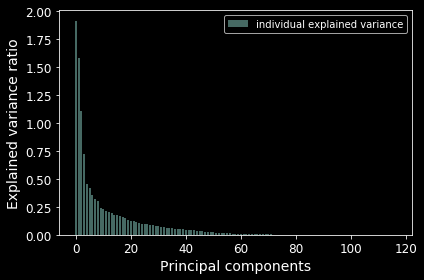

In [122]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(117), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()